<a href="https://colab.research.google.com/github/AI-KPI/DLBookNotes/blob/main/2.2 Multiplying Matrices and Vectors/2.2 Multiplying Matrices and Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Стиль
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Уникайте неточних плаваючих значень (наприклад, для зворотних матриць у крапковому добутку)
# Дивись https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
def plotVectors(vecs, cols, alpha=1):
    """
    Створюємо набір векторів.

    Параметри
    ----------
    vecs : array-like
        Координати векторів для побудови графіку. Кожен вектор знаходиться у масиві. Наприклад:
        [[1, 3], [2, 2]]можна використовувати для побудови 2 векторів.
    cols : array-like
        Кольори векторів. Наприклад: ['red', 'blue']відображатиме
        перший вектор червоним, а другий синім.
    alpha : float
        Непрозорість векторів

    Повертає:

    fig : екземпляр matplotlib.figure.Figure
        Фігура векторів
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
    Цей матеріал є частиною курсу, що йде після глави 2 про лінійну алгебру з [Deep Learning Book](http://www.deeplearningbook.org/) Гудфеллоу, І., Бенджо, Ю. та Курвіля, А. ( 2016). Він спрямований на підготовку чуття/малюнків/коду на мові python з математичних теорій і побудований так, як я розумію ці поняття. Ви можете подивитися на навчальний план у [вступній публікації](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/).
</span>

# Вступ

Останній розділ був дуже веселим! Цей буде трохи менш важким. Ми побачимо ще один спосіб декомпозиції матриць: Декомпозиція сингулярних значень або SVD. З початку цього курсу я підкреслював той факт, що ви можете розглядати матриці як лінійне перетворення в просторі. За допомогою SVD ви розкладаєте матрицю в три інші матриці. Ви зможете побачити ці нові матриці як * під-перетворення * простору. Замість того, щоб робити перетворення одним рухом, ми розкладаємо його в три рухи. В якості бонусу ми застосуємо SVD для обробки зображень. Ми побачимо вплив SVD на образ гусі Люсі (це просто гусак на ім’я Люсі ...), тож продовжуйте читати!

# 2.8 Декомпозиція одиничного значення

<img src="images/unit-circle-transformation1.png" width="400" alt="Одиничне кола та його перетворення" title="Перетворення одиничного кола">
<em>Одиничне коло та його перетворення матрицею.</em>

Ми бачили в [2.7](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.7-Eigendecomposition/) , що власне розкладання може бути здійснено лише для квадратних матриць. Спосіб розкладання інших типів матриць, які неможливо розкласти за допомогою власного розкладання, полягає у використанні **розкладання сингулярних значень** (SVD).

Ми розкладемо $\bs{A}$ на 3 матриці (замість двох із власним розкладом):

<img src="images/singular-value-decomposition.png" width="300" alt="Ілюстрація розкладу одиничного значення" title="Декомпозиція одиничного значення">
<em>Декомпозиція одиничного значення</em>

Матриці $\bs{U}$, $\bs{D}$ і $\bs{V}$ мають такі властивості:

- $\bs{U}$ і $\bs{V}$ - ортогональні матриці ($\bs{U}^\text{T}=\bs{U}^{-1}$ і $\bs{V}^\text{T}=\bs{V}^{-1}$; дивись [2.6](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.6-Special-Kinds-of-Matrices-and-Vectors/) для отримання додаткової інформації про ортогональні матриці)

- $\bs{D}$ діагональна матриця (всі 0, крім діагоналі; див. [2.6](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.6-Special-Kinds-of-Matrices-and-Vectors/)). Однак $\bs{D}$ не обов'язково квадрат.

Стовпці $\bs{U}$ називаються ліво-сингулярними векторами $\bs{A}$, тоді як стовпці $\bs{V}$ - право-сингулярними векторами $\bs{A}$. Значення по діагоналі $\bs{D}$ є одиничними значеннями $\bs{A}$.

Ось розміри факторизації:

<img src="images/singular-value-decomposition-understanding-dimensions.png" width="300" alt="Розміри розкладу одиничного значення (SVD)" title="Розміри розкладу одиничного значення (SVD)">
<em>Розміри розкладу одиничного значення</em>


Діагональна матриця одиничних значень не квадратна, а має форму $\bs{A}$. Подивіться на приклад, наведений у документі [Numpy doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) , щоб побачити, що вони створюють матрицю нулів з такою ж формою як $\bs{A}$ та заповніть її особливими значеннями:

```python
smat = np.zeros((9, 6), dtype=complex)
smat[:6, :6] = np.diag(s)
```

# Інтуїція

Я думаю, що інтуїція, яка стоїть за декомпозицією одиничного значення, потребує деяких пояснень щодо ідеї матричного перетворення. З цієї причини, ось кілька прикладів, що показують, як простір може бути перетворений двовимірними квадратними матрицями. Сподіваюсь, це призведе до кращого розуміння цього твердження: $\bs{A}$ - це матриця, яку можна розглядати як лінійне перетворення. Це перетворення можна розкласти на три під-перетворення: 1. обертання, 2. повторне масштабування, 3. обертання. Ці три кроки відповідають трьом матрицям $\bs{U}$, $\bs{D}$ і $\bs{V}$.

<span class='pquote'>
    $\bs{A}$ є матрицею, яку можна розглядати як лінійне перетворення. Це перетворення можна розкласти на три під-перетворення: 1. обертання, 2. повторне масштабування, 3. обертання. Ці три кроки відповідають трьом матрицям $\bs{U}$, $\bs{D}$ і $\bs{V}$.
</span>

Ви можете подивитися на [цю анімацію](https://en.wikipedia.org/wiki/Singular-value_decomposition) зі статті Вікіпедії про SVD. Якщо прокрутити сторінку вниз, ви побачите кожен крок.

### Кожну матрицю можна розглядати як лінійне перетворення

Ви можете бачити матрицю як конкретне лінійне перетворення. Коли ви *застосуєте* цю матрицю до вектора або до іншої матриці, ви застосуєте це лінійне перетворення до неї.

### Приклад 1.

Ми змінимо вектор:

$$
\bs{v}=\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}
$$

застосовуючи матрицю:

$$
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

Ми отримаємо:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    2x + 0y\\\\
    0x + 2y
\end{bmatrix}=
\begin{bmatrix}
    2x\\\\
    2y
\end{bmatrix}
$$

Ми бачимо, що застосовуючи матрицю:

$$
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

просто подвоїла кожну координату нашого вектора. Ось графічне зображення $\bs{v}$ та його перетворення $\bs{w}$:

<img src="images/transformation-vector-by-matrix.png" width="400" alt="Ділянка вектора та його перетворення" title="Матриця збільшила обидві координати вектора">
<em>Застосовуючи матрицю до вектора, множимо кожну координату на два</em>

Ви можете подивитися інші приклади простих перетворень векторів та одиничного кола в [це відео](https://www.youtube.com/watch?v=kJIUbtSowRg).


### Приклад 2.

Щоб представити лінійне перетворення, пов'язане з матрицями, ми також можемо намалювати одиничне коло і побачити, як матриця може його перетворити (див. БОНУС у [2.7](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.7-Eigendecomposition/)). Одиничне коло представляє координати кожного одиничного вектора (вектор довжиною 1, див[2.6](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.6-Special-Kinds-of-Matrices-and-Vectors/)).

<img src="images/unit-circle.png" width="200" alt="Представлення одиничного кола" title="Одиничне коло">
<em>Одиничне коло</em>

Тоді можна застосувати матрицю до всіх цих одиничних векторів, щоб побачити, яку деформацію вона буде створювати.

Знову застосуємо матрицю:

$$
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

до одиничного кола:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    2x\\\\
    2y
\end{bmatrix}
$$

<img src="images/unit-circle-transformation.png" width="400" alt="Представлення одиничного кола та його перетворення" title="Одиничне коло та його перетворення">
<em>Ще одне подання ефекту матриці: кожна координата одиничного кола множилася на два</em>

Ми бачимо, що матриця подвоїла розмір кола. Але в деяких перетвореннях зміна, застосована до координати $x$, відрізняється від зміни, застосованої до координати $y$. Давайте подивимось, що це означає графічно.

### Приклад 3.

Ми застосуємо матрицю:

$$
\begin{bmatrix}
    3 & 0\\\\
    0 & 2
\end{bmatrix}
$$

до одиничного кола:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    3 & 0\\\\
    0 & 2
\end{bmatrix}\cdot
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    3x\\\\
    2y
\end{bmatrix}
$$

Це дає наступне нове коло:

<img src="images/unit-circle-transformation1.png" width="400" alt="Представлення одиничного кола та його перетворення" title="Одиничне коло та його перетворення">
<em>Цього разу матриця не масштабувала кожну координату з однаковою вагою</em>

Ми можемо перевірити це за допомогою рівнянь, пов'язаних з цим матричним перетворенням. Скажімо, координати нового кола (після перетворення) становлять $x'$ і $y'$. Співвідношення між старими координатами ($x$, $y$) та новими координатами($x'$, $y'$)::

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    3x\\\\
    2y
\end{bmatrix}
\Leftrightarrow
\begin{cases}
x=\frac{x'}{3}\\\\
y=\frac{y'}{2}
\end{cases}
$$

Ми також знаємо, що рівняння одиничного кола дорівнює $x^2+y^2=1$ (норма одиничних векторів дорівнює 1, див. [2.5](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/)). В результаті заміни ми отримуємо:

$$
\begin{align*}
\left(\frac{x'}{3}\right)^2 + \left(\frac{y'}{2}\right)^2 = 1\\\\
\left(\frac{y'}{2}\right)^2 = 1 - \left(\frac{x'}{3}\right)^2\\\\
\frac{y'}{2} = \sqrt{1 - \left(\frac{x'}{3}\right)^2}\\\\
y' = 2\sqrt{1 - \left(\frac{x'}{3}\right)^2}
\end{align*}
$$

Ми можемо перевірити, що це рівняння відповідає нашому перетвореному колу. Почнемо з того, що намалюємо старе коло. Його рівняння дорівнює:

$$
\begin{align*}
x^2+y^2=1\\\\
y^2=1-x^2\\\\
y=\sqrt{1-x^2}
\end{align*}
$$

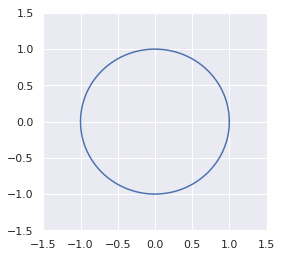

In [6]:
x = np.linspace(-1, 1, 100000)
y = np.sqrt(1-(x**2))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

Все йде нормально!

*Підказка щодо кодування*: Тут ви можете побачити фокус для побудови кола: ви створюєте змінну $x$, тоді $y$ визначається з $x$. Це означає, що для кожного $x$ обчислюється відповідне значення $y$ (і, таким чином, $y$ має таку ж форму, як $x$). Оскільки результат квадратного кореня може бути негативним або позитивним (наприклад, 4 може бути результатом $2^2$, але також і $(-2)^2$), нам потрібно побудувати обидва рішення ($y$ і $-y$ у `plt.plot`). Зауважте також, що багато значень потрібні, якщо ми хочемо зв’язок між двома напівсферами. Див. дискусію [тут](https://stackoverflow.com/questions/32092899/plot-equation-showing-a-circle).


Тепер додамо коло, отримане після перетворення матриці. Ми побачили, що це визначено з

$$
y = 2\sqrt{1 - \left(\frac{x}{3}\right)^2}
$$

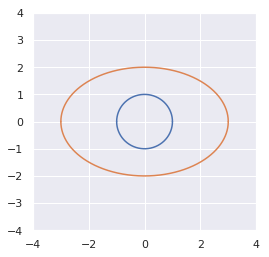

In [7]:
x1 = np.linspace(-3, 3, 100000)
y1 = 2*np.sqrt(1-((x1/3)**2))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.plot(x1, y1, sns.color_palette().as_hex()[1])
plt.plot(x1, -y1, sns.color_palette().as_hex()[1])
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

Це свідчить про те, що наша трансформація була правильною.

Зверніть увагу, що в цих прикладах використовувались **діагональні матриці** (усі нулі, крім діагоналі). Загальне правило полягає в тому, що перетворення, пов'язане з діагональними матрицями, передбачає лише масштабування кожної координати **без обертання**. Це перший крок для розуміння SVD. Подивіться ще раз на розкладання

<img src="images/singular-value-decomposition.png" width="300">

<span class='pquote'>
    Перетворення, пов'язане з діагональними матрицями, передбачає лише масштабування кожної координати **без обертання**
</span>

Ми побачили, що матриця $\bs{D}$ є діагональною матрицею. І ми також побачили, що це відповідає масштабуванню без обертання.

### Примклад 4. матриця обертання

Матриці, які не є діагональними, можуть створювати обертання (див. докладніше [тут](https://en.wikipedia.org/wiki/Rotation_matrix)). Оскільки про кути легше думати, коли ми говоримо про обертання, ми будемо використовувати матрицю виду

$$
R=
\begin{bmatrix}
    cos(\theta) & -sin(\theta)\\\\
    sin(\theta) & cos(\theta)
\end{bmatrix}
$$

Ця матриця буде обертати наші вектори або матриці проти годинникової стрілки на кут $\theta$. Наші нові координати будуть

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    cos(\theta) & -sin(\theta)\\\\
    sin(\theta) & cos(\theta)
\end{bmatrix}
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    xcos(\theta) - ysin(\theta)\\\\
    xsin(\theta) + ycos(\theta)
\end{bmatrix}
$$

Повернемо деякі вектори на кут $\theta = 45^\circ$.

Почнемо з вектора $\bs{u}$ координат $x=0$ і $y=1$ та вектора $\bs{v}$ координат $x=1$ і $y=0$. Вектори $\bs{u'}$ $\bs{v'}$ - це обернені вектори.

<img src="images/unit-vectors-rotation.png" width="200" alt="Обертання одиничних векторів за допомогою матриці" title="Обертання одиничних векторів">
<em>Обертання одиничних векторів проти годинникової стрілки з $\theta=45^\circ$</em>

По-перше, давайте побудуємо $\bs{u}$ та $\bs{v}$.

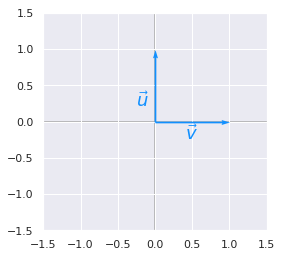

In [8]:
orange = '#FF9A13'
blue = '#1190FF'
    
u = [1,0]
v = [0,1]

plotVectors([u, v], cols=[blue, blue])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.25, 0.2, r'$\vec{u}$', color=blue, size=18)
plt.text(0.4, -0.25, r'$\vec{v}$', color=blue, size=18)
plt.show()

Вони є <a href="https://en.wikipedia.org/wiki/Basis_(linear_algebra)">базовими векторами </a> нашого простору. Ми обчислимо перетворення цих векторів:

$$
\begin{cases}
u_x = 0\cdot cos(45) - 1\cdot sin(45)\\\\
u_y = 0\cdot sin(45) + 1\cdot cos(45)
\end{cases}
\Leftrightarrow
\begin{cases}
u_x = -sin(45)\\\\
u_y = cos(45)
\end{cases}
$$

$$
\begin{cases}
v_x = 1\cdot cos(45) - 0\cdot sin(45)\\\\
v_y = 1\cdot sin(45) + 0\cdot cos(45)
\end{cases}
\Leftrightarrow
\begin{cases}
v_x = cos(45)\\\\
v_y = sin(45)
\end{cases}
$$

Зараз ми побудуємо ці нові вектори, щоб перевірити, чи вони є нашими базисними векторами, повернутими на кут $45^\circ$.

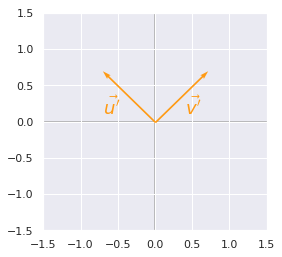

In [9]:
u1 = [-np.sin(np.radians(45)), np.cos(np.radians(45))]
v1 = [np.cos(np.radians(45)), np.sin(np.radians(45))]

plotVectors([u1, v1], cols=[orange, orange])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.7, 0.1, r"$\vec{u'}$", color=orange, size=18)
plt.text(0.4, 0.1, r"$\vec{v'}$", color=orange, size=18)
plt.show()

*Порада щодо кодування:* функції numpy `sin` і` cos` беруть вхідні дані в радіанах. Ми можемо перетворити наш кут із градусів у радіани за допомогою функції `np.radians()`.

Ми також можемо перетворити коло. Ми візьмемо масштабоване коло (те, що з прикладу 3.), щоб мати змогу побачити ефект обертання.

<img src="images/rescaled-circle-rotated.png" width="300" alt="Масштабоване коло (не однакової висоти та ширини) оберталося" title="Обернене масштабоване коло">
<em>Вплив матриці обертання на масштабоване коло</em>

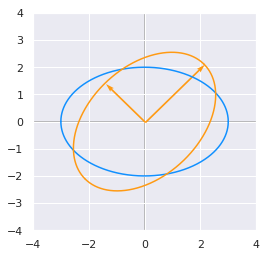

In [10]:
x = np.linspace(-3, 3, 100000)
y = 2*np.sqrt(1-((x/3)**2))

x1 = x*np.cos(np.radians(45)) - y*np.sin(np.radians(45))
y1 = x*np.sin(np.radians(45)) + y*np.cos(np.radians(45))

x1_neg = x*np.cos(np.radians(45)) - -y*np.sin(np.radians(45))
y1_neg = x*np.sin(np.radians(45)) + -y*np.cos(np.radians(45))

u1 = [-2*np.sin(np.radians(45)), 2*np.cos(np.radians(45))]
v1 = [3*np.cos(np.radians(45)), 3*np.sin(np.radians(45))]

plotVectors([u1, v1], cols=['#FF9A13', '#FF9A13'])

plt.plot(x, y, '#1190FF')
plt.plot(x, -y, '#1190FF')

plt.plot(x1, y1, '#FF9A13')
plt.plot(x1_neg, y1_neg, '#FF9A13')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

Ми бачимо, що коло повернуто на кут $45^\circ$. Ми вибрали довжину векторів із ваги масштабування з прикладу 3 (коефіцієнти 3 та 2), щоб відповідати колу.

### Підсумок

Я сподіваюся, що ви зрозуміли, як вектори та матриці можуть бути перетворені за допомогою обертання або масштабування матриць. SVD можна розглядати як розкладання одного складного перетворення на 3 простіші перетворення (обертання, масштабування та інше обертання).

Зверніть увагу, що ми взяли лише квадратні матриці. SVD можна зробити навіть з неквадратними матрицями, але важче представити перетворення, пов'язані з неквадратними матрицями. Наприклад, матриця 3 на 2 відображатиме 2D-простір у 3D-простір.

<img src="images/non-square-matrix-change-dimensions.png" width="250" alt="Неквадратна матриця змінює кількість розмірів вхідних даних" title="Приклад зміни розмірів">
<em>Неквадратна матриця змінює кількість розмірів вхідних даних</em>

# Три перетворення

Тепер, коли зв’язок між матрицями та лінійним перетворенням стає яснішим, ми можемо перевірити, що перетворення, пов’язане з матрицею, може бути розкладено за допомогою SVD.

Але спочатку давайте створимо функцію, яка приймає 2D-матрицю як вхідну інформацію і намалюємо перетворення одиничного кола, коли ми застосуємо до неї цю матрицю. Буде корисно візуалізувати перетворення.

In [11]:
def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    """
    Зміна одиничного кола та базисного вектора, застосувавши матрицю.
    Візуалізація ефекту матриці у 2D.

    Параметри
    ----------
    matrix : array-like
        2D-матриця для застосування до одиничного кола.
    vectorsCol : HEX колір
        Колір базисних векторів

    Повертає:

    fig : екземпляр matplotlib.figure.Figure
        Фігура, що містить модифіковані одиничні кола та базисні вектори.
    """
    # Одиничне коло
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))
    
    # Модифіковане одиничне коло (окремі негативна та позитивна частини)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y
    
    # Вектори
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]
    
    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])

    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)

Ми можемо використовувати її, щоб перевірити, що три перетворення, задані SVD, еквівалентні перетворенню, здійсненому з оригінальною матрицею. Ми також намалюємо кожен крок SVD, щоб побачити незалежний ефект першого обертання, масштабування та другого обертання.

Ми будемо використовувати матрицю:

$$
\bs{A}=\begin{bmatrix}
    3 & 7\\\\
    5 & 2
\end{bmatrix}
$$

і побудуємо графік одиничного кола та його перетворення за допомогою $\bs{A}$:

Unit circle:


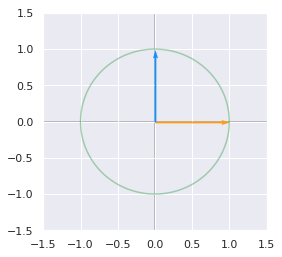

Unit circle transformed by A:


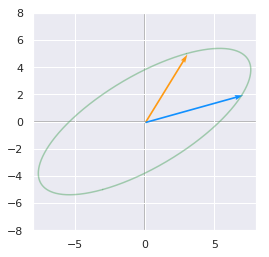

In [12]:
A = np.array([[3, 7], [5, 2]])

print 'Unit circle:'
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print 'Unit circle transformed by A:'
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

Це те, що ми отримуємо, застосовуючи матрицю $\bs{A}$ до одиничного кола та базисних векторів. Ми бачимо, що два базисні вектори не обов’язково обертаються однаково. Це пов’язано зі знаком визначника матриці(дивись [2.11](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.11-The-determinant/)).

Давайте тепер обчислимо SVD для $\bs{A}$:

In [13]:
U, D, V = np.linalg.svd(A)
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

In [14]:
D

array([8.71337969, 3.32821489])

In [15]:
V

array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

Тепер ми можемо розглянути суб-перетворення, розглянувши ефект матриць $\bs{U}$, $\bs{D}$ і $\bs{V}$ в зворотному порядку. Зверніть увагу, що він повертає правильний сингулярний вектор **вже транспонований** (див.  [doc](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html)).

Unit circle:


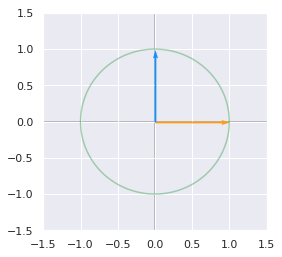

Перше обертання:


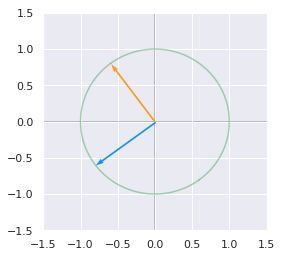

Масштабування:


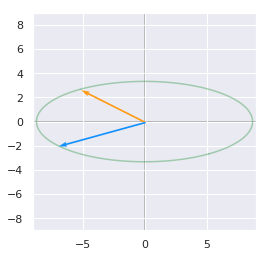

Друге обертання:


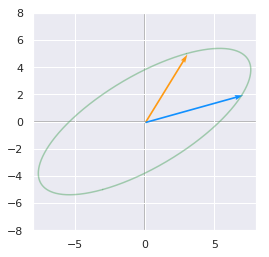

In [16]:
# Одиничне коло
print 'Unit circle:'
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print 'Перше обертання:'
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print 'Масштабування:'
matrixToPlot(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print 'Друге обертання:'
matrixToPlot(U.dot(np.diag(D)).dot(V))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

Щоб бути впевненим, ви можете порівняти цей останній крок із перетворенням на $\bs{A}$. На щастя, ви побачите, що результат однаковий:

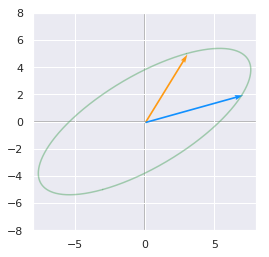

In [17]:
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

# Інтерпретація одиничних значень

Одиничні значення упорядковуються за спаданням. Вони відповідають новому набору ознак (які є лінійною комбінацією вихідних ознак), причому перша ознака пояснює більшу частину дисперсії. Наприклад, з останнього прикладу ми можемо візуалізувати ці нові функції. Головною віссю еліпса буде перший лівий сингулярний вектор ($u_1$), а його нормою буде перше сингулярне значення ($\sigma_1$).

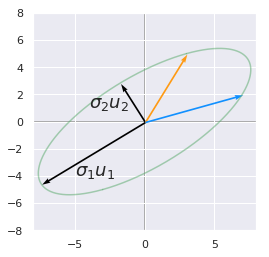

In [18]:
u1 = [D[0]*U[0,0], D[0]*U[0,1]]
v1 = [D[1]*U[1,0], D[1]*U[1,1]]

plotVectors([u1, v1], cols=['black', 'black'])

matrixToPlot(A)

plt.text(-5, -4, r"$\sigma_1u_1$", size=18)
plt.text(-4, 1, r"$\sigma_2u_2$", size=18)

plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

Вони є головною ($\sigma_1u_1$) і другорядною ($\sigma_2u_2$) осями еліпсу. Ми бачимо, що ознака, що відповідає цій головній осі, асоціюється з більшою дисперсією (діапазон значень на цій осі більший за інший). Див. [2.12](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.12-Example-Principal-Components-Analysis/) для отримання більш докладної інформації про пояснення дисперсії.

# SVD і власне розкладання

Тепер, коли ми розуміємо тип декомпозиції, проведеної за допомогою SVD, ми хочемо знати, як знаходяться суб-перетворення.

Матриці $\bs{U}$, $\bs{D}$ і $\bs{V}$ можна знайти, перетворивши $\bs{A}$ у квадратну матрицю та обчисливши власні вектори цієї квадратної матриці. Квадратну матрицю можна отримати, помноживши матрицю $\bs{A}$ на її транспонування так чи інакше:

- $\bs{U}$ відповідає власним векторам $\bs{AA}^\text{T}$
- $\bs{V}$ відповідає власним векторам $\bs{A^\text{T}A}$
- $\bs{D}$ відповідає власним векторам $\bs{AA}^\text{T}$ або $\bs{A^\text{T}A}$ які однакові.

Візьмемо приклад неквадратної матриці:

$$
\bs{A}=\begin{bmatrix}
    7 & 2\\\\
    3 & 4\\\\
    5 & 3
\end{bmatrix}
$$

Розкладання одиничного значення можна здійснити за допомогою функції `linalg.svd ()` від Numpy (зауважте, що `np.linalg.eig (A)` працює лише на квадратних матрицях і дасть помилку для `A`).

In [19]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

In [20]:
D

array([10.25142677,  2.62835484])

In [21]:
V

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

## Ліво-сингулярні значення

Ліво-сингулярні значення $\bs{A}$ відповідають власним векторам $\bs{AA}^\text{T}$.

### Приклад 5.

Зверніть увагу, що різниця знаків походить від того, що власні вектори не є унікальними. Функції `linalg` від Numpy повертають нормовані власні вектори. Масштабування до `-1` не змінює їх напрямок або той факт, що вони є одиничними векторами.

In [22]:
U, D, V = np.linalg.svd(A)

Ліво-сингулярні вектори A:

In [23]:
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

Власні вектори AA_transpose:

In [24]:
np.linalg.eig(A.dot(A.T))[1]

array([[-0.69366543, -0.59343205, -0.40824829],
       [-0.4427092 ,  0.79833696, -0.40824829],
       [-0.56818732,  0.10245245,  0.81649658]])

## Право-сингулярні значення

Право-сингулярні значення $\bs{A}$ відповідають власним векторам $\bs{A}^\text{T}\bs{A}$.

### Приклад 6.

In [25]:
U, D, V = np.linalg.svd(A)

Право-сингулярні вектори A:

In [26]:
V

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

Власні вектори A_transposeA:

In [27]:
np.linalg.eig(A.T.dot(A))[1]

array([[ 0.88033817, -0.47434662],
       [ 0.47434662,  0.88033817]])

## Ненульові одиничні значення

Ненульові одиничні значення $\bs{A}$ є квадратними коренями власних значень $\bs{A}^\text{T}\bs{A}$ та $\bs{AA}^\text{T}$.

### Приклад 7.

In [28]:
U, D, V = np.linalg.svd(A)
D

array([10.25142677,  2.62835484])

Власні значення A_transposeA:

In [29]:
np.linalg.eig(A.T.dot(A))[0]

array([105.09175083,   6.90824917])

Власні значення AA_transpose:

In [30]:
np.linalg.eig(A.dot(A.T))[0]

array([105.09175083,   6.90824917,  -0.        ])

Квадратний корінь власних значень:

In [31]:
np.sqrt(np.linalg.eig(A.T.dot(A))[0])

array([10.25142677,  2.62835484])

# БОНУС: Застосування SVD на зображення

У цьому прикладі ми будемо використовувати SVD для вилучення з зображення більш важливих функцій. Приємно бачити вплив SVD на щось дуже візуальне. Код натхненний/взятий із [цього посту](https://www.frankcleary.com/svdimage/).

Почнемо із завантаження зображення в python і перетворення його в масив Numpy. Ми перетворимо його на шкалу сірого, щоб мати один вимір на піксель. Форма матриці відповідає розміру зображення, заповненого значеннями інтенсивності: 1 комірка на піксель.

In [33]:
#з імпорту зображення PIL

plt.style.use('classic')
img = Image.open('test_svd.jpg')
# конвертувати зображення у відтінки сірого
imggray = img.convert('LA')
# перетворити в масив numpy
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Переформування відповідно до вихідних розмірів зображення
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

NameError: ignored

Ми побачимо, як перевірити вплив SVD на **гуся Люсі**! Почнемо виділяти ліві одиничні вектори, одиничні значення та правий одиничні вектори:

In [34]:
U, D, V = np.linalg.svd(imgmat)

NameError: ignored

Давайте перевіримо форми наших матриць:

In [ ]:
imgmat.shape

In [ ]:
U.shape

In [ ]:
D.shape

In [ ]:
V.shape

Пам’ятайте, що $\bs{D}$ - це одиничні значення, які потрібно ввести в діагональну матрицю. Крім того, $\bs{V}$ не потрібно транспонувати (див. вище).

Сингулярні вектори та одиничні значення упорядковані з першими, що відповідають більшій поясненій дисперсії. З цієї причини використання лише перших кількох одиничних векторів та одиничних значень забезпечить реконструкцію основних елементів зображення.

Ми можемо реконструювати зображення з певної кількості одиничних значень. Наприклад, для 2 одиничних значень ми матимемо:

<img src="images/dimensions-reconstruction-image-singular-value-decomposition.png" width="400" alt="Розміри розкладання одиничного значення для реконструкції зображення з декількох компонентів" title="Розміри реконструкції зображення">
<em>Ми можемо відновити зображення за кількома компонентами</em>

У цьому прикладі ми відновили зображення 669 пікселів на 1000 пікселів з двох одиничних значень. 

In [ ]:
reconstimg = np.matrix(U[:, :2]) * np.diag(D[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

Важко побачити Люсі лише з двома одиничними значеннями та сингулярними векторами. Але ми вже щось бачимо!

Тепер ми проведемо реконструкцію, використовуючи різну кількість одиничних значень.

In [ ]:
for i in [5, 10, 15, 20, 30, 50]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

Вау! Навіть із 50 компонентами якість зображення непогана!

# Висновок

Мені подобається цей розділ про SVD, оскільки він використовує те, що ми дізналися на даний момент, у конкретному застосуванні. Наступний розділ, присвячений псевдоінверсії, також досить цікавий, тому продовжуйте читати! Ми побачимо, як знайти близьке рішення системи рівняння, яка мінімізує помилку, і в кінці ми побачимо приклад, який використовує псевдоінверсію для пошуку найкращої лінії набору точок даних.

<span class='notes'>
      Не соромтеся писати мені електронний лист чи коментар. Програму цієї статті можна знайти [у вступній статті](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/). Всі блокноти можна знайти на [Github](https://github.com/hadrienj/deepLearningBook-Notes).
</span>

# Список літератури

Оригінал [Singular Value Decomposition](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.8%20Singular%20Value%20Decomposition/2.8%20Singular%20Value%20Decomposition.ipynb)
## Малювання кола за допомогою Matplotlib

- https://stackoverflow.com/questions/32092899/plot-equation-showing-a-circle

## Матриця обертання

- https://en.wikipedia.org/wiki/Rotation_matrix)

## Базисні вектори

- https://en.wikipedia.org/wiki/Basis_(linear_algebra)

## Лінійне перетворення

- [Aran Glancy - Linear transformation and matrices](https://www.youtube.com/watch?v=kJIUbtSowRg)

## SVD

- [Singular Value Decomposition - Wikipedia](https://en.wikipedia.org/wiki/Singular-value_decomposition)

- [Professor-svd](https://fr.mathworks.com/company/newsletters/articles/professor-svd.html)

- [Intoli - PCA and SVD](https://intoli.com/blog/pca-and-svd/)

## Numpy

- [Numpy SVD doc](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html)

## Обробка зображень

- [Frank Cleary - SVD of an image](https://www.frankcleary.com/svdimage/)
- [2.2 Multiplying Matrices and Vectors](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.2%20Multiplying%20Matrices%20and%20Vectors/2.2%20Multiplying%20Matrices%20and%20Vectors.ipynb)

In [ ]:
u = [0,0,1,6]
v = [0,0,4,2]
u_bis = [u[2], u[3], v[2],v[3]]
w = [u[0]+v[0], u[1]+v[1], u[2]+v[2], u[3]+v[3]]

plotVectors([u, u_bis, w], ['red', 'green', 'blue'])
plt.xlim(0, 10)
plt.ylim(0, 10)

Переклад: Шапран Андрій, студент ІО-01мн, 2020 рік